In [1698]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

from scipy import stats

import warnings
warnings.filterwarnings("ignore")


ksN = 100           # Kolmogorov-Smirnov KS test for goodness of fit: samples
ALPHA = 0.05        # significance level for hypothesis test

# 1. Intro

In [1699]:

from scipy.stats import (
    norm, beta, expon, gamma, genextreme, logistic, lognorm, triang, uniform, fatiguelife,            
    gengamma, gennorm, dweibull, dgamma, gumbel_r, powernorm, rayleigh, weibull_max, weibull_min, 
    laplace, alpha, genexpon, bradford, betaprime, burr, fisk, genpareto, hypsecant, 
    halfnorm, halflogistic, invgauss, invgamma, levy, loglaplace, loggamma, maxwell, 
    mielke, ncx2, ncf, nct, nakagami, pareto, lomax, powerlognorm, powerlaw, rice, 
    semicircular, trapezoid, rice, invweibull, foldnorm, foldcauchy, cosine, exponpow, 
    exponweib, wald, wrapcauchy, truncexpon, truncnorm, t, rdist
    )


distributions = [
    norm, beta, expon, gamma, genextreme, logistic, lognorm, triang, uniform, fatiguelife,            
    gengamma, gennorm, dweibull, dgamma, gumbel_r, powernorm, rayleigh, weibull_max, weibull_min, 
    laplace, alpha, genexpon, bradford, betaprime, burr, fisk, genpareto, hypsecant, 
    halfnorm, halflogistic, invgauss, invgamma, levy, loglaplace, loggamma, maxwell, 
    mielke, ncx2, ncf, nct, nakagami, pareto, lomax, powerlognorm, powerlaw, rice, 
    semicircular, trapezoid, rice, invweibull, foldnorm, foldcauchy, cosine, exponpow, 
    exponweib, wald, wrapcauchy, truncexpon, truncnorm, t, rdist
    ]


In [1700]:
dist_continu = [d for d in dir(stats) if
                isinstance(getattr(stats, d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if
                 isinstance(getattr(stats, d), stats.rv_discrete)]
print('number of continuous distributions: %d' % len(dist_continu))
print('number of discrete distributions:   %d' % len(dist_discrete))

number of continuous distributions: 104
number of discrete distributions:   19


No handles with labels found to put in legend.


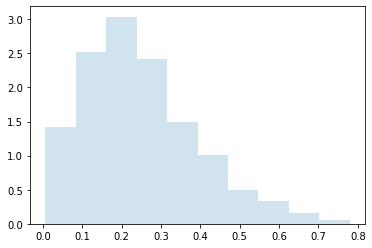

In [1701]:
# example: properties of the beta distribution

a, b = 2, 6

x = beta.rvs(a, b, size=1000)

fig, ax = plt.subplots(1, 1)
ax.hist(x, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
pass

In [1702]:
print(type(beta))

<class 'scipy.stats._continuous_distns.beta_gen'>


In [1703]:
# statistics of the Beta(2,6) distribution
m = beta.mean(a,b)
v = beta.var(a,b)
shp_a = beta.a
shp_b = beta.b
median = beta.median(a,b)

dict_stats = {"mean":m, "var":v, "shape a":shp_a, "shape b":shp_b, "median":median}
_ = [print(k,":",f'{v:.3f}') for k,v in dict_stats.items()]

mean : 0.250
var : 0.021
shape a : 0.000
shape b : 1.000
median : 0.228


In [1704]:
# first 4 moments of Beta(2,6)
moments_values = beta.stats(a,b, moments="mvsk")

moments_names = ["mean", "var", "skew", "kurt"]
moments = dict(zip(moments_names, moments_values))
_ = [print(k,":",f'{v:.3f}') for k,v in moments.items()]

mean : 0.250
var : 0.021
skew : 0.693
kurt : 0.109


In [1705]:
# freeze the distibution as an object with its current parameters, assign it to variable rv

rv = beta(a,b)
moments = rv.stats("mvsk")
_ = [print(f'{v:.3f}') for v in moments]


0.250
0.021
0.693
0.109


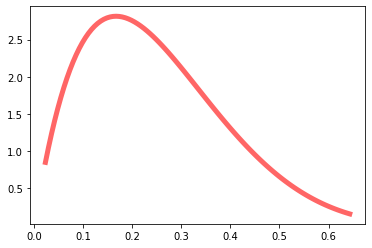

In [1706]:
# plot the pdf
x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf')
pass

In [1707]:
rv.support()

(0.0, 1.0)

In [1708]:
gamma(1,1).support()

(1.0, inf)

(100.0, 320.0)


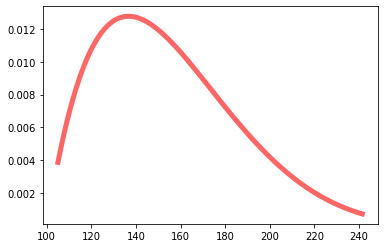

In [1709]:
# horizontally shift the beta distribution and rescale its right tail to 

loc, scl = 100, 220
rv = beta(a,b, loc,scl)
print(rv.support())

x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf')
pass

In [1710]:
# get the first 4 moments and append the std deviation

moments_values = [v.item() for v in rv.stats(moments="mvsk")]
moments_values.append(rv.std())
moments_names = ["mean", "var", "skew", "kurt", "std"]

moments = dict(zip(moments_names, moments_values))
_ = [print(k,":",f'{v:.3f}') for k,v in moments.items()]


mean : 155.000
var : 1008.333
skew : 0.693
kurt : 0.109
std : 31.754


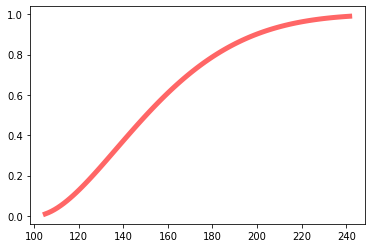

In [1711]:
# plot the cdf

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.cdf(x), 'r-', lw=5, alpha=0.6, label='beta cdf')
pass


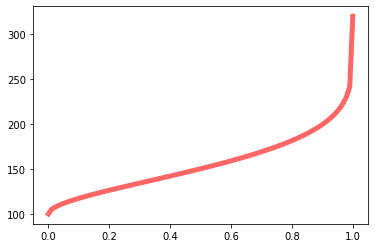

In [1712]:
# plot the inverse cdf or ppf

q = np.linspace(0.0, 1.0, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(q, rv.ppf(q), 'r-', lw=5, alpha=0.6, label='beta inverse cdf')
pass


In [1713]:
# cdf(x) and pdf(x) for selected points x
xeval = [100.0, rv.ppf(0.01), 120.0, rv.median(), rv.mean(), rv.ppf(.99), 300.0, 320.0]
cdfx = rv.cdf(xeval)
pdfx = rv.pdf(xeval)
_ = {print(f'{k:.1f}',":",f'{c:.4f}',"/",f'{p:.4f}') for k,c,p in zip(xeval, cdfx, pdfx)}


100.0 : 0.0000 / 0.0000
105.0 : 0.0100 / 0.0039
120.0 : 0.1276 / 0.0108
150.3 : 0.5000 / 0.0119
155.0 : 0.5551 / 0.0113
241.5 : 0.9900 / 0.0007
300.0 : 1.0000 / 0.0000
320.0 : 1.0000 / 0.0000


In [1714]:
# percent point function / quantiles

ppfq = rv.ppf(cdfx)

_ = {print(f'{x:.3f}',":",f'{q:.3f}') for x,q in zip(xeval, ppfq)}
assert(all(abs(xeval - ppfq)) < 1e-6)

100.000 : 100.000
104.986 : 104.986
120.000 : 120.000
150.268 : 150.268
155.000 : 155.000
241.540 : 241.540
300.000 : 300.000
320.000 : 320.000


# 2. Fitting a Weibull Distribution to Model Time Till Failure

No handles with labels found to put in legend.


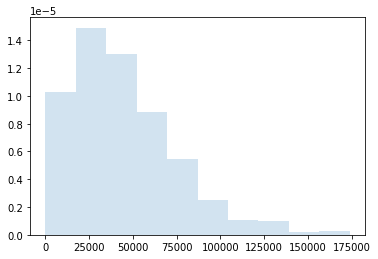

In [1715]:
# create synthetic observations for lifetime data by generating 1000 Weibull random variates
# assume these are expert estimates

shp, loc, scl = 1.5, 0, 50000

rv = weibull_min(c=shp, loc=loc, scale=scl)

data = rv.rvs(1000)

fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
pass

In [1716]:
stats.skew(data)

1.1056335329791707

In [1717]:
# distribution fitter and KS test

# we decide to fix one of the parameters, the location, at its known value of 0, by entering the keyword 'floc'
# if left flexible, a location paramater can exert a massive influence on shape and scale
    
params = weibull_min.fit(data, floc=0)

param_names = ["shape", "loc", "shape"]
dict_param = {print(k,":",f'{v:.3f}') for k,v in zip(param_names, params)}

shape : 1.525
loc : 0.000
shape : 49839.178


In [1718]:
# KS test for goodness of fit: p-value > 0.05 =
ks = stats.kstest(data, weibull_min.name, params, ksN)[1]   # return p-value
print(f'{ks:.3f}')

0.883


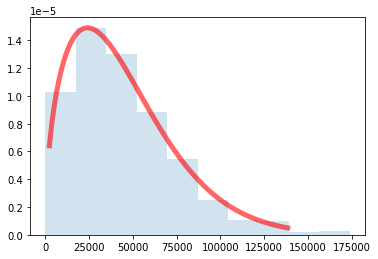

In [1719]:
# plot the actual data and the fitted weibull pdf
rv = weibull_min(shp, loc, scl)

x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf')
pass

In [1720]:
# mean time to failure
print(f'{rv.mean():.0f}')

45137


In [1721]:
T = 20000

cdfT = rv.cdf(T)           # cumulative failure rate after T hours

svfT = 1 - cdfT
svfT = rv.sf(T)

dict_f = {"at hours":T, "% cumulative failures":cdfT, "surviving % of all components":svfT}
_ = [print(k,":",f'{v:.3f}') for k,v in dict_f.items()]
# svf % of all components will last at least T hours

at hours : 20000.000
% cumulative failures : 0.224
surviving % of all components : 0.776


In [1722]:
T = 10000

cdfT = rv.cdf(T)           # cumulative failure rate after T hours

svfT = 1 - cdfT
svfT = rv.sf(T)

dict_f = {"at hours":T, "% cumulative failures":cdfT, "surviving % of all components":svfT}
_ = [print(k,":",f'{v:.3f}') for k,v in dict_f.items()]
# svf % of all components will last at least T hours

at hours : 10000.000
% cumulative failures : 0.086
surviving % of all components : 0.914


In [1723]:
T = 500

cdfT = rv.cdf(T)           # cumulative failure rate after T hours

svfT = 1 - cdfT
svfT = rv.sf(T)

dict_f = {"at hours":T, "% cumulative failures":cdfT, "surviving % of all components":svfT}
_ = [print(k,":",f'{v:.3f}') for k,v in dict_f.items()]
# svf % of all components will last at least T hours

at hours : 500.000
% cumulative failures : 0.001
surviving % of all components : 0.999


In [1724]:
# time to a cumulative failure rate of 1%

q = 0.01
ppfq = rv.ppf(q)           

print(f'{ppfq:.0f}', "hours")

2329 hours


# 3. The Auto-Fitter

In [1725]:
# KS test for goodness of fit

def kstest(data, distname, paramtup):
    ks = stats.kstest(data, distname, paramtup, ksN)[1]   # return p-value
    return ks             # return p-value


In [1726]:
# distribution fitter and call to KS test

def fitdist(data, dist):    
    fitted = dist.fit(data, floc=0.0)
    ks = kstest(data, dist.name, fitted)
    res = (dist.name, ks, *fitted)
    return res

In [1727]:
# call fitting function for all distributions in list
res = [fitdist(data,D) for D in distributions]

# convert the fitted list of tuples to dataframe
pd.options.display.float_format = '{:,.3f}'.format
df = pd.DataFrame(res, columns=["distribution", "KS p-value", "param1", "param2", "param3", "param4", "param5"])
df["distobj"] = distributions
df.sort_values(by=["KS p-value"], inplace=True, ascending=False)
df.reset_index(inplace=True)
df.drop("index", axis=1, inplace=True)
df

,distribution,KS p-value,param1,param2,param3,param4,param5,distobj
0,weibull_min,0.883,1.525,0.000,"49,839.178",NaN,NaN,<scipy.stats._continuous_distns.weibull_min_ge...
1,beta,0.552,1.742,10.475,0.000,"314,806.815",NaN,<scipy.stats._continuous_distns.beta_gen objec...
2,burr,0.528,4.025,0.325,0.000,"65,946.527",NaN,<scipy.stats._continuous_distns.burr_gen objec...
3,mielke,0.528,1.310,4.025,0.000,"65,946.689",NaN,<scipy.stats._continuous_distns.mielke_gen obj...
4,ncf,0.441,0.003,37.906,10.706,0.000,10.030,<scipy.stats._continuous_distns.ncf_gen object...
...,...,...,...,...,...,...,...,...
56,trapezoid,0.000,1.000,1.000,0.000,"208,482.388",NaN,<scipy.stats._continuous_distns.trapezoid_gen ...
57,exponpow,0.000,1.985,0.000,31.645,NaN,NaN,<scipy.stats._continuous_distns.exponpow_gen o...
58,alpha,0.000,0.000,0.000,"2,185.492",NaN,NaN,<scipy.stats._continuous_distns.alpha_gen obje...
59,weibull_max,0.000,1.500,0.000,0.000,NaN,NaN,<scipy.stats._continuous_distns.weibull_max_ge...


In [1728]:

def plot_fitted_pdf(df):
    
    N = len(df)
    chrows = math.ceil(N/3)                    # how many rows of charts if 3 in a row
    fig, ax = plt.subplots(chrows, 3, figsize=(20, 5 * chrows))
    ax = ax.ravel()
    dfRV = pd.DataFrame()

    for i in df.index:

        # D_row = df.iloc[i,:-1]
        D_name = df.iloc[i,0]
        D = df.iloc[i,7]
        KSp = df.iloc[i,1]
        params = df.iloc[i,2:7]    
        params = [p for p in params if ~np.isnan(p)]

        # calibrate x-axis by finding the 1% and 99% quantiles in percent point function
        x = np.linspace(
                    D.ppf(0.01, *params), 
                    D.ppf(0.99, *params), 100)

        #fig, ax = plt.subplots(1, 1)
        # plot histogram of actual observations
        ax[i].hist(data, density=True, histtype='stepfilled', alpha=0.2)
        # plot fitted distribution
        rv = D(*params)
        title = f'pdf {D_name}, with p(KS): {KSp:.2f}' 
        ax[i].plot(x, rv.pdf(x), 'r-', lw=2, label=title)
        ax[i].legend(loc="upper right", frameon=False)    

        

In [1729]:
# from dataframe, select distributions with high KS p-value
df_ks = df.loc[df["KS p-value"] > ALPHA]
print(df_ks.shape)
print("Fitted Distributions with KS p-values > ALPHA:")
df_ks


(8, 8)
Fitted Distributions with KS p-values > ALPHA:


,distribution,KS p-value,param1,param2,param3,param4,param5,distobj
0,weibull_min,0.883,1.525,0.000,"49,839.178",NaN,NaN,<scipy.stats._continuous_distns.weibull_min_ge...
1,beta,0.552,1.742,10.475,0.000,"314,806.815",NaN,<scipy.stats._continuous_distns.beta_gen objec...
2,burr,0.528,4.025,0.325,0.000,"65,946.527",NaN,<scipy.stats._continuous_distns.burr_gen objec...
3,mielke,0.528,1.310,4.025,0.000,"65,946.689",NaN,<scipy.stats._continuous_distns.mielke_gen obj...
4,ncf,0.441,0.003,37.906,10.706,0.000,10.030,<scipy.stats._continuous_distns.ncf_gen object...
5,nakagami,0.326,0.665,0.000,"54,057.857",NaN,NaN,<scipy.stats._continuous_distns.nakagami_gen o...
6,exponweib,0.318,1.832,1.107,0.000,"33,181.632",NaN,<scipy.stats._continuous_distns.exponweib_gen ...
7,gamma,0.154,1.986,0.000,"22,612.325",NaN,NaN,<scipy.stats._continuous_distns.gamma_gen obje...


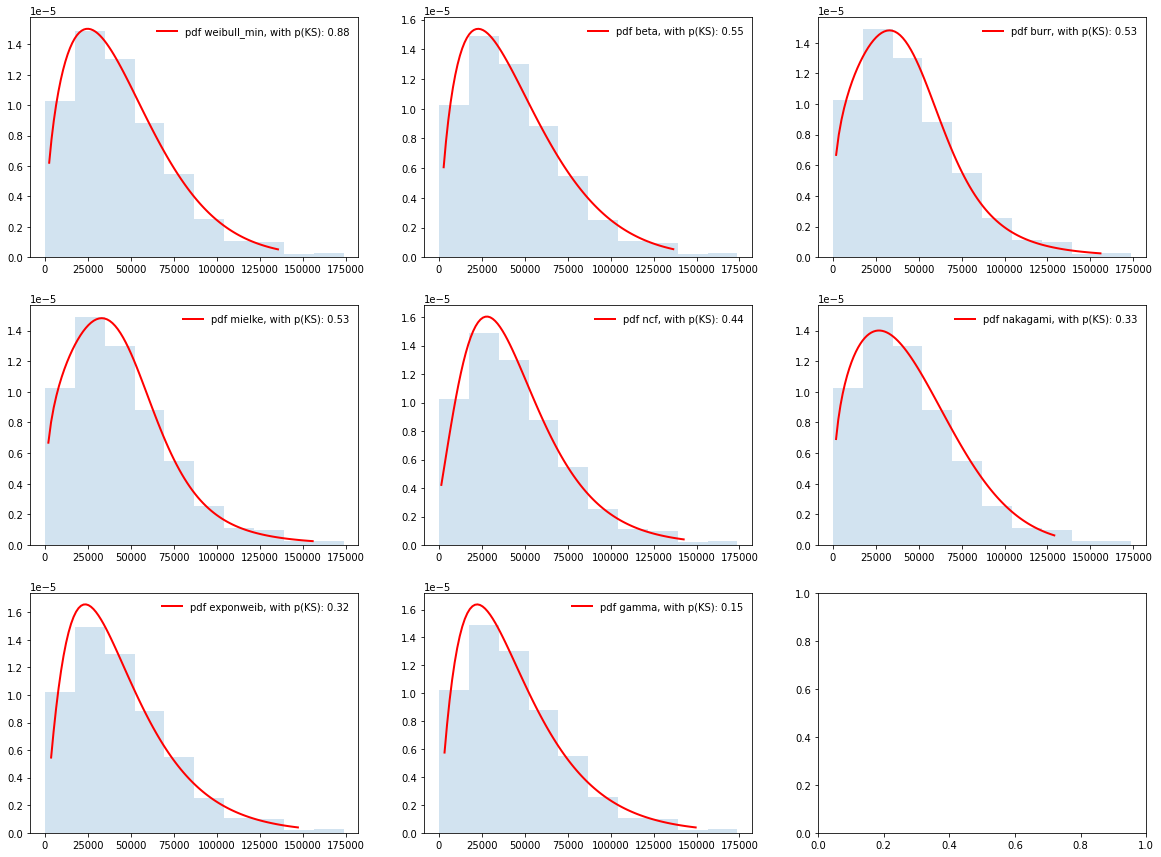

In [1730]:
# call the plotting function
plot_fitted_pdf(df_ks)
pass

In [1731]:
# fitted distribution with highest p-value of KS test
D_opt = df_ks.loc[df_ks["KS p-value"].idxmax()]
# D_opt[:-1]
D_opt


distribution                                          weibull_min
KS p-value                                                  0.883
param1                                                      1.525
param2                                                      0.000
param3                                                 49,839.178
param4                                                        NaN
param5                                                        NaN
distobj         <scipy.stats._continuous_distns.weibull_min_ge...
Name: 0, dtype: object

In [1732]:
# script takes this best fitting distribution and begins to works with it:
# parameters

print(D_opt.iloc[0])            # name
DO = D_opt.iloc[7]              # distribution object

params = D_opt.iloc[2:7]    
params = [p for p in params if ~np.isnan(p)]
params


weibull_min


[1.525384222021152, 0.0, 49839.17767175549]

In [1733]:
# statistics of the best fitting distribution
stats = DO.stats(*params, "mvsk")
stat_names = ["mean", "variance", "skew", "kurtosis"]
dict_stats = {k:v for k,v in zip(stat_names, stats)} 
_ = [print(k,":",f'{v:.4f}') for k,v in dict_stats.items()]

mean : 44903.7020
variance : 901247858.3014
skew : 1.0427
kurtosis : 1.2940


In [1734]:
# CDF of a chosen x, here the mean
x = dict_stats["mean"]
cdfx = DO.cdf(x, *params)
cdfx

0.5738388332003941

In [1735]:
# cross-check: if we insert the CDF's probability in the percent point function ppf,
# will we get the mean as the quantile?
ppfq = DO.ppf(cdfx, *params)
assert abs(ppfq - x) < 1e-9
ppfq

44903.70200843498

In [1736]:
# cross-check: if we insert the CDF's probability in the percent point function ppf,
# will we get the mean as the quantile?
ppfq = DO.ppf(0.5, *params)
ppfq

39194.07435010098

In [1737]:
# support [min, max] of distribution:
DO.support(*params)

(0.0, inf)